In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Дискретное распределение

Сгенерируем выборку объёма 100 из дискретного распределения с шестью равновероятными исходами.

In [2]:
sample = np.random.choice([1,2,3,4,5,6], 100)
sample

array([5, 5, 4, 3, 3, 4, 3, 5, 6, 5, 4, 3, 5, 1, 2, 5, 1, 1, 2, 1, 4, 4, 4,
       3, 4, 3, 1, 5, 4, 3, 5, 2, 3, 4, 2, 5, 4, 1, 2, 2, 6, 2, 5, 3, 2, 3,
       2, 3, 3, 3, 3, 3, 2, 6, 2, 4, 2, 6, 5, 5, 3, 3, 1, 3, 2, 5, 1, 6, 4,
       3, 2, 5, 1, 4, 5, 5, 1, 2, 4, 1, 4, 3, 1, 4, 1, 5, 6, 1, 1, 1, 4, 3,
       2, 5, 6, 1, 3, 1, 3, 3])

Представим теперь, что эта выборка была получена не искусственно, а путём подбрасывания симметричного шестигранного кубика 100 раз. Оценим вероятности выпадения каждой из сторон с помощью частот:

In [3]:
# посчитаем число выпадений каждой из сторон:
from collections import Counter

c = Counter(sample)

print("Число выпадений каждой из сторон:")    
print(c)

# теперь поделим на общее число подбрасываний и получим вероятности:
print("Вероятности выпадений каждой из сторон:")
print({k: v/100.0 for k, v in c.items()})

Число выпадений каждой из сторон:
Counter({3: 24, 1: 18, 5: 18, 4: 17, 2: 16, 6: 7})
Вероятности выпадений каждой из сторон:
{1: 0.18, 2: 0.16, 3: 0.24, 4: 0.17, 5: 0.18, 6: 0.07}


Это и есть оценка функции вероятности дискретного распределения.

# Непрерывное распределение

Сгенерируем выборку объёма 100 из стандартного нормального распределения (с $\mu=0$ и $\sigma^2=1$):

In [4]:
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)
sample

array([ 1.18616709, -0.99047031,  0.4468773 ,  0.68234884,  1.04531555,
       -1.4628278 ,  0.08184165,  0.23049702,  0.49207708,  1.0616811 ,
       -0.5300617 , -0.87089468, -0.2594645 ,  0.76433027, -0.6294182 ,
        0.03876566, -0.34661768,  1.38115305, -0.22643204,  1.65870343,
        0.91115718,  0.24675408,  0.42672511, -1.99888027, -0.21123309,
       -0.77361709,  1.46083922,  0.18886926,  1.30832265,  0.60270846,
        0.25610338,  0.60237903,  0.60311017,  0.91311652, -1.02809895,
        1.81451475,  0.72133106,  1.03032882, -1.16801891,  0.09045219,
        0.65311007, -0.13967595,  0.80353711, -1.06193971,  1.11206663,
        0.48008486, -1.10810212,  1.21388082, -0.24724579, -0.77089752,
       -0.67663463, -0.65109301, -0.80016998, -0.81056456,  0.6163586 ,
       -1.31371894, -1.32392283, -1.82325226, -0.42727309, -0.15373599,
        1.01635584, -0.88065621,  0.86599384,  0.65970304, -1.3584017 ,
        0.77284545,  1.91669128,  0.106437  , -0.29220088, -0.19

Эмпирическая функция распределения для полученной выборки:

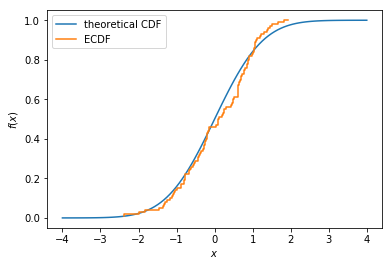

In [5]:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Гистограмма выборки:

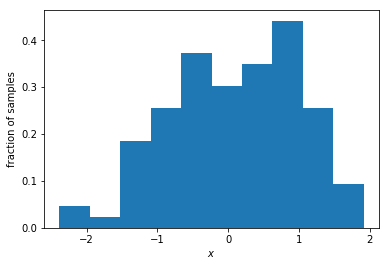

In [6]:
plt.hist(sample, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Попробуем задавать число карманов гистограммы вручную:

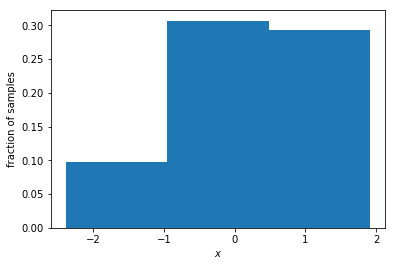

In [7]:
plt.hist(sample, bins=3, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

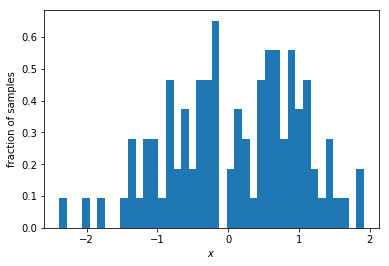

In [8]:
plt.hist(sample, bins=40, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания:

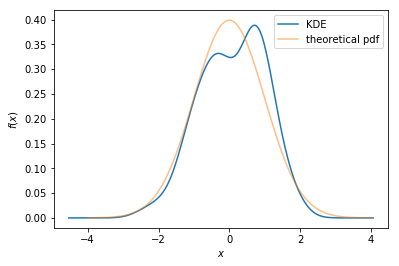

In [11]:
# для построения используем библиотеку Pandas:
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')